In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import pickle

with open(f'animations/test_ER11.pkl', 'rb') as file:
        data_anim = pickle.load(file)


In [48]:
len(data_anim)/5

940.0

In [44]:
len(data_anim[0][0])

12000

In [9]:
len(data_anim)

9764

In [10]:
accs = np.array([data_anim[i][2] + [0] * (5 - len(data_anim[i][2])) for i in range(len(data_anim))]).transpose()

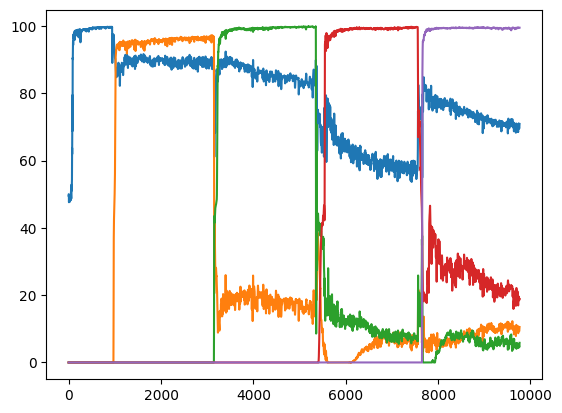

In [11]:
for p in accs:
    plt.plot(p)

In [2]:
def create_animation(path):
    with open(f'animations/{path}.pkl', 'rb') as file:
        data_anim = pickle.load(file)

    TASKS = 5
    EPOCHS = len(data_anim) // TASKS

    color_palette = [
        'red', 'blue', 'green', 'purple', 'orange', 
        'cyan', 'magenta', 'yellow', 'brown', 'pink'
    ]

    fig, axs = plt.subplots(2, TASKS, figsize=(25, 10))

    all_features = np.concatenate([d[1] for d in data_anim])
    x_min, x_max = all_features[:, 0].min() - 50, all_features[:, 0].max() + 50
    y_min, y_max = all_features[:, 1].min() - 50, all_features[:, 1].max() + 50
    accs = np.array([data_anim[i][2] + [0] * (5 - len(data_anim[i][2])) for i in range(len(data_anim))]).transpose()

    scatters = []
    for task in range(TASKS):
        scatter = {}
        current_data = data_anim[0]
        unique_classes = np.unique(current_data[0])
        for i, c in enumerate(unique_classes):
            scatter[(0,c)] = axs[0,task].scatter(
                current_data[1][:, 0][current_data[0] == c],
                current_data[1][:, 1][current_data[0] == c],
                color=color_palette[i],
                label=f'Class {c}'
            )
        
        axs[0,task].set_xlim(x_min, x_max)
        axs[0,task].set_ylim(y_min, y_max)
        axs[1,task].set_xlim(0, TASKS * EPOCHS)
        axs[1,task].set_ylim(0, 1)
            
        axs[0,task].set_title(f"Task {task}, Epoch 0")
        axs[0,task].legend()
        scatters.append(scatter)

    def update(frame):    
        for task in range(frame//EPOCHS, TASKS):
            current_data = data_anim[frame]
            unique_classes = np.unique(current_data[0])
            
            for existing_scatter in scatters[task].values():
                try:
                    existing_scatter.remove()
                except:
                    print("no existing_scatter")
            scatters[task] = {}
            for i, c in enumerate(unique_classes):
                scatters[task][(0,c)] = axs[0,task].scatter(
                    current_data[1][:, 0][current_data[0] == c],
                    current_data[1][:, 1][current_data[0] == c],
                    color=color_palette[i],
                    label=f'Class {c}'
                )
            for t in range(frame//EPOCHS):
                scatters[task][(1,c)] = axs[1,task].plot(accs[t][:frame],
                    color=color_palette[t],
                    label=f'{t}'
                )
            
            axs[0,task].set_xlim(x_min, x_max)
            axs[0,task].set_ylim(y_min, y_max)
            axs[1,task].set_xlim(0, TASKS * EPOCHS)
            axs[1,task].set_ylim(0, 1)
            
            axs[0,task].set_title(f"Task {task}, Epoch {frame}")
            axs[0,task].legend()
        
        return [scatter for task_scatters in scatters for scatter in task_scatters.values()]

    ani = FuncAnimation(
        fig, 
        update, 
        frames=TASKS * EPOCHS, 
        interval=100, 
        repeat=False, 
        blit=False
    )

    ani.save(f'animations/{path}.gif', writer='pillow', fps=100)

create_animation("test_ER11")

In [3]:
create_animation("test_ER11")

no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter
no existing_scatter


In [ ]:

TASKS = 5
EPOCHS = len(data_anim) // TASKS

color_palette = [
    'red', 'blue', 'green', 'purple', 'orange', 
    'cyan', 'magenta', 'yellow', 'brown', 'pink'
]

fig, axs = plt.subplots(1, TASKS, figsize=(25, 5))

all_features = np.concatenate([d[1] for d in data_anim])
x_min, x_max = all_features[:, 0].min() - 50, all_features[:, 0].max() + 50
y_min, y_max = all_features[:, 1].min() - 50, all_features[:, 1].max() + 50

scatters = []
for task in range(TASKS):
    scatter = {}
    current_data = data_anim[0]
    unique_classes = np.unique(current_data[0])
    for i, c in enumerate(unique_classes):
        scatter[c] = axs[task].scatter(
            current_data[1][:, 0][current_data[0] == c],
            current_data[1][:, 1][current_data[0] == c],
            color=color_palette[i],
            label=f'Class {c}'
        )
    
    axs[task].set_xlim(x_min, x_max)
    axs[task].set_ylim(y_min, y_max)
    
    axs[task].set_title(f"Task {task}, Epoch 0")
    axs[task].legend()
    scatters.append(scatter)

def update(frame):    
    for task in range(frame//EPOCHS, TASKS):
        current_data = data_anim[frame]
        unique_classes = np.unique(current_data[0])
        
        for existing_scatter in scatters[task].values():
            existing_scatter.remove()
        
        scatters[task] = {}
        for i, c in enumerate(unique_classes):
            scatters[task][c] = axs[task].scatter(
                current_data[1][:, 0][current_data[0] == c],
                current_data[1][:, 1][current_data[0] == c],
                color=color_palette[i],
                label=f'Class {c}'
            )
        
        axs[task].set_xlim(x_min, x_max)
        axs[task].set_ylim(y_min, y_max)
        
        axs[task].set_title(f"Task {task}, Epoch {frame}")
        axs[task].legend()
    
    return [scatter for task_scatters in scatters for scatter in task_scatters.values()]

# Create the animation
ani = FuncAnimation(
    fig, 
    update, 
    frames=TASKS * EPOCHS, 
    interval=1000, 
    repeat=False, 
    blit=False
)

# Save the animation
ani.save(f'animations/{path}.gif', writer='pillow', fps=1)

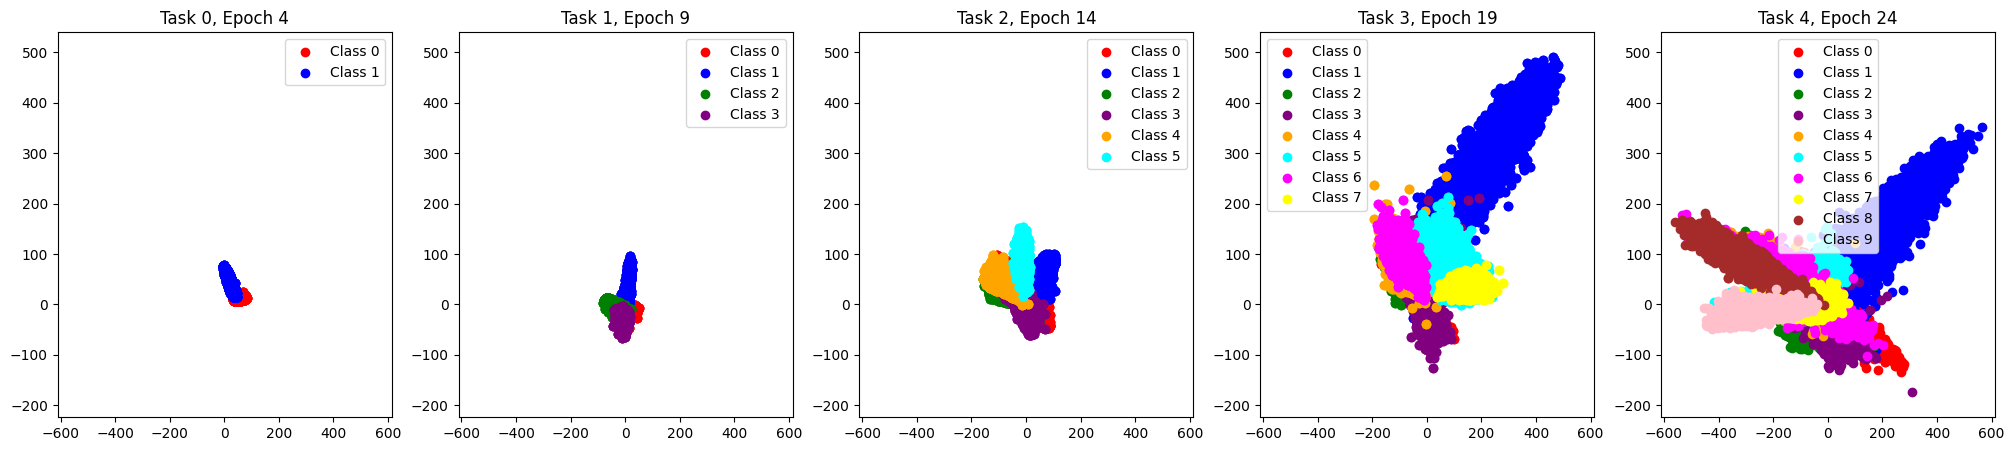

In [64]:
create_animation("FMNIST_forget")